# Utilities

## Libraries

In [2]:
#standad libraries
import numpy as np
import os

In [16]:
# statisitcs libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Data

In [5]:
#scan information
model_df = pd.read_csv('../data/fovea_progression_dataset_excluding_unknowns.csv')

In [14]:
fovea_landmarks = pd.read_csv('../data/fovea_landmarks.csv')

# Statistics

## Frequency Distribution

In [6]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   scan_name       20500 non-null  object
 1   scan_number     20500 non-null  int64 
 2   folder_name     20500 non-null  object
 3   patient_id      20500 non-null  int64 
 4   eye_side        20500 non-null  object
 5   status          20500 non-null  bool  
 6   label           20500 non-null  int64 
 7   sequence        20500 non-null  object
 8   sequence_label  20500 non-null  int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 1.3+ MB


### Left and Right Eye

In [12]:
pivot_table_eye_side = model_df.pivot_table(
    index='patient_id',
    columns='eye_side',
    values='folder_name',
    aggfunc='nunique',  # Change 'count' to 'nunique' to count unique values
    fill_value=0
)
pivot_table_eye_side.columns = ['left_eye_scans', 'right_eye_scans']
pivot_table_eye_side['total_scans'] = pivot_table_eye_side['left_eye_scans'] + pivot_table_eye_side['right_eye_scans']
pivot_table_eye_side.reset_index(inplace=True)
print("Left and Right Eye scan distributions:\n\n", pivot_table_eye_side)

print("\nTotal Scans:", pivot_table_eye_side['total_scans'].sum())

Left and Right Eye scan distributions:

    patient_id  left_eye_scans  right_eye_scans  total_scans
0          47               2                0            2
1          64               8               15           23
2         190               0                1            1
3         321               1                1            2
4         326               0                3            3
5         341               1                0            1
6         345               2                3            5
7         578               2                2            4

Total Scans: 41


### Start to Deepest to End

In [18]:
# Initialize a list to hold the results
results = []

# Iterate over each group of patient_id and folder_name
for (patient_id, folder_name), group in fovea_landmarks.groupby(['patient_id', 'folder_name']):
    # If the group has at least the necessary slices to calculate gaps
    if len(group) > 0:
        start = group['start'].iloc[0]
        deepest = group['deepest'].iloc[0]
        end = group['end'].iloc[0]
        
        # Calculate gaps
        start_mid_gap = deepest - start
        mid_end_gap = end - deepest
        
        # Append the result to the list
        results.append({
            'patient_id': patient_id,
            'folder_name': folder_name,
            'start_to_deepest': start_mid_gap,
            'deepest_to_end': mid_end_gap
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display or save the results
display(results_df)

,patient_id,folder_name,start_to_deepest,deepest_to_end
0,47,047_OS_1_GA_6x6_SSOCT_1,55,102
1,47,047_OS_2_GA_6x6_SSOCT_1,64,110
2,64,064_OD_10_GA_6x6_SSOCT_1,103,90
3,64,064_OD_1_GA_6x6_SSOCT_1,78,82
4,64,064_OD_1_GA_6x6_SSOCT_2,74,79
5,64,064_OD_2_GA_6x6_SSOCT_1,75,83
6,64,064_OD_3_GA_6x6_SSOCT_1,80,94
7,64,064_OD_4_GA_6x6_SSOCT_1,74,96
8,64,064_OD_5_GA_6x6_SSOCT_1,80,101
9,64,064_OD_5_GA_6x6_SSOCT_2,84,100


### Sequence Label Distribution

sequence_label
0    7727
6    6565
4    3253
2    2832
1      41
3      41
5      41
Name: count, dtype: int64


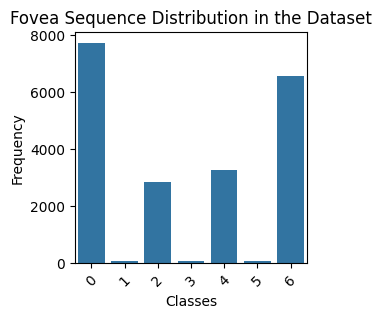

In [23]:
class_counts = model_df['sequence_label'].value_counts()
print(class_counts)
plt.figure(figsize=(3, 3))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Fovea Sequence Distribution in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels if there are many classes
plt.show()